In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d as Axes3d
from PIL import Image
from torch import nn, optim, reshape
import random
import requests

In [3]:
# Load the data (energydata complete.csv)
df = pd.read_csv('energydata_complete.csv')

In [16]:
url = 'https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv'
response = requests.get(url)

with open('energydata_complete.csv', 'w') as f:
    f.write(response.text)

energydata = pd.read_csv('energydata_complete.csv')

energydata_np =energydata.to_numpy()
print(energydata_np.shape)

(19735, 29)


[13.275433157104999 18.606194981839508 28.64266816759482 ...
 29.19911708449945 6.322783650830388 34.11885058740154]


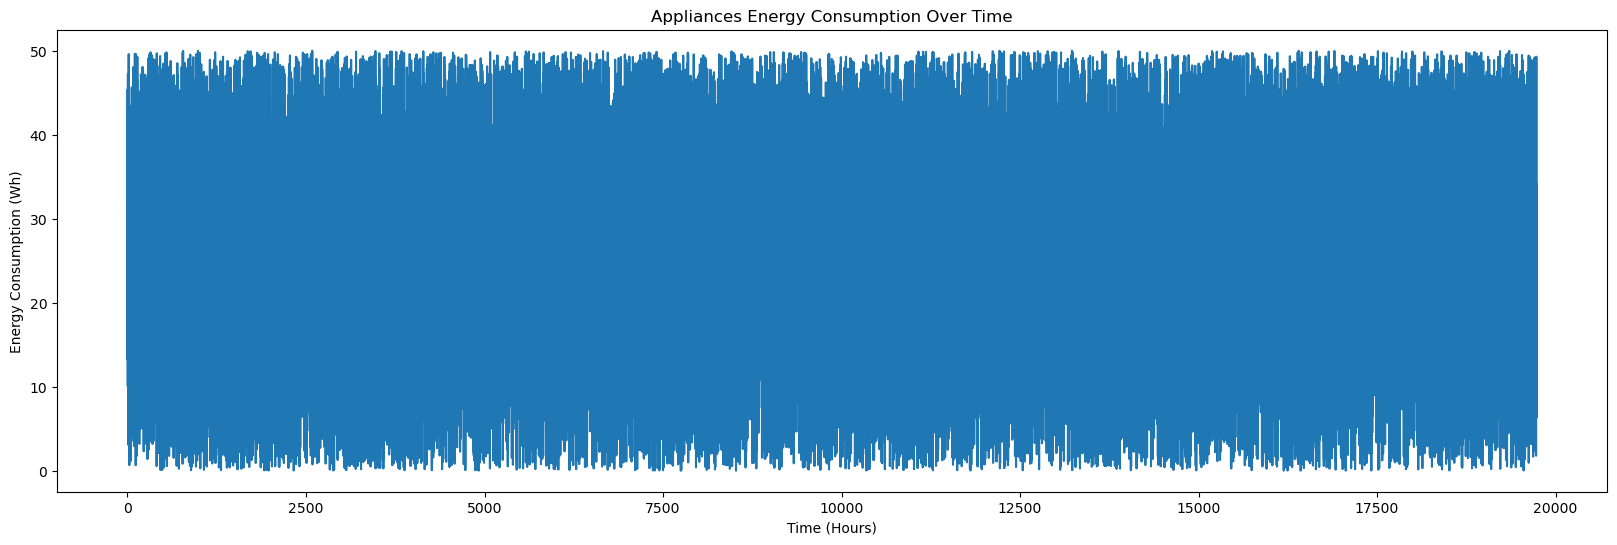

In [17]:
energy_consumption = energydata_np[:,28]
print(energy_consumption)
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(energy_consumption)
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption Over Time')
plt.show()

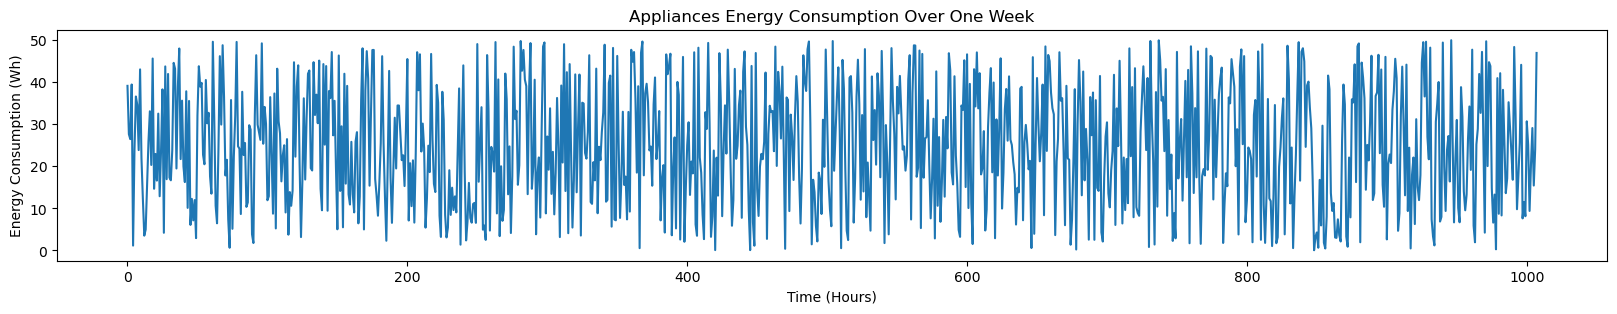

In [18]:
energy_consumption_1st_week = energydata_np[42:7*24*6+42,27]
energy_consumption_1st_week
fig, ax = plt.subplots(figsize=(20, 3))
plt.plot(energy_consumption_1st_week)
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption Over One Week')
plt.show()

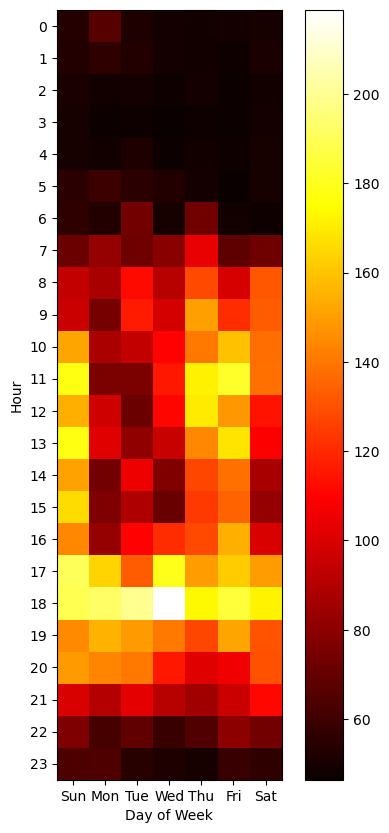

In [20]:
# Load the data into a pandas DataFrame
df = pd.read_csv("energydata_complete.csv")

# Convert the date column to datetime and extract the hour and day of week
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

# Group the data by hour and day of week and take the mean of the appliances column
agg = df.groupby(['hour', 'day_of_week'], as_index=False).mean()

# Pivot the data to create a 2-dimensional array with hours as the rows and days of week as the columns
pivot = agg.pivot(index='hour', columns='day_of_week', values='Appliances')

# Plot the heatmap
plt.figure(figsize=(6,10))
plt.imshow(pivot, cmap='hot')
plt.yticks(range(0,24,1))
xtick_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']  
plt.xticks(range(0,7,1),xtick_labels)
plt.colorbar()
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.show()

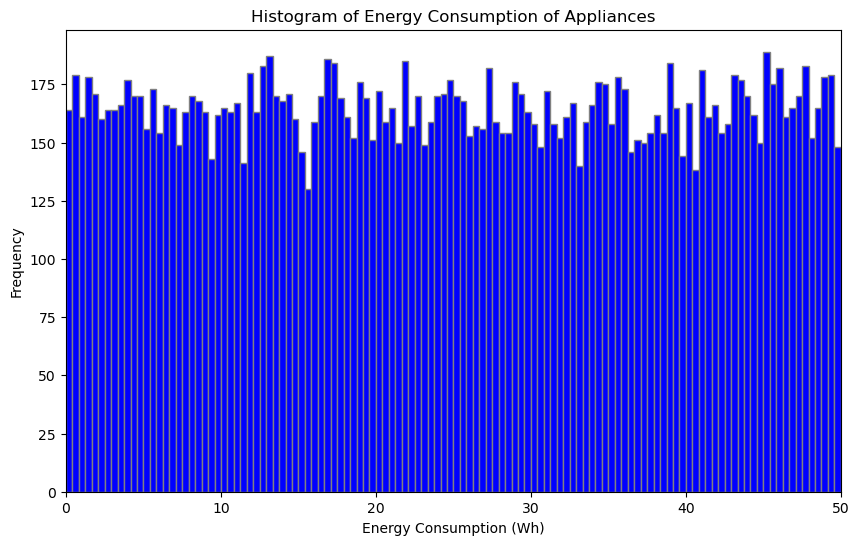

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(energy_consumption, bins=120, color='blue', edgecolor='gray')
plt.xlim(0, 50)
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption of Appliances')
plt.show()

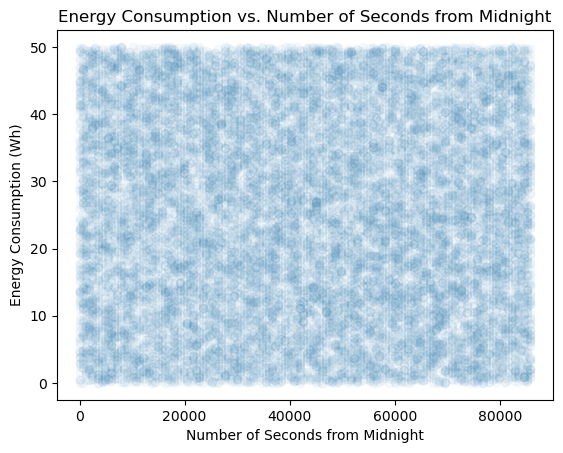

In [22]:
energydata['date'] = pd.to_datetime(energydata['date'], format='%Y-%m-%d %H:%M:%S')
energydata['NSM'] = (energydata['date'].dt.hour * 3600) + (energydata['date'].dt.minute * 60) + energydata['date'].dt.second

#energy consumption vs NSM
plt.scatter(energydata['NSM'], energy_consumption, alpha=0.03)
plt.xlabel('Number of Seconds from Midnight')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. Number of Seconds from Midnight')
plt.show()

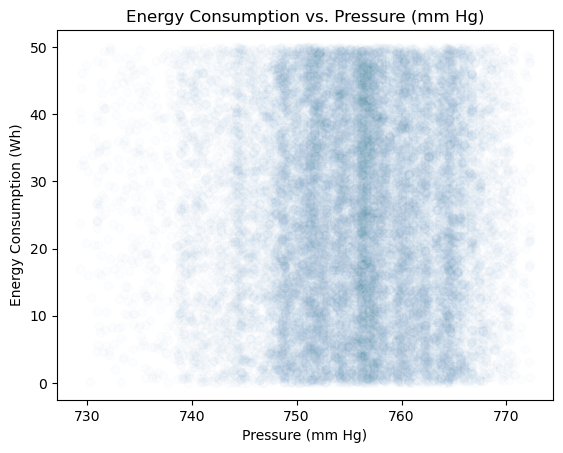

In [23]:
press_mm_hg = energydata['Press_mm_hg'].values

#energy consumption vs Press_mm_hg
plt.scatter(press_mm_hg, energy_consumption, alpha=0.01)
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. Pressure (mm Hg)')
plt.show()

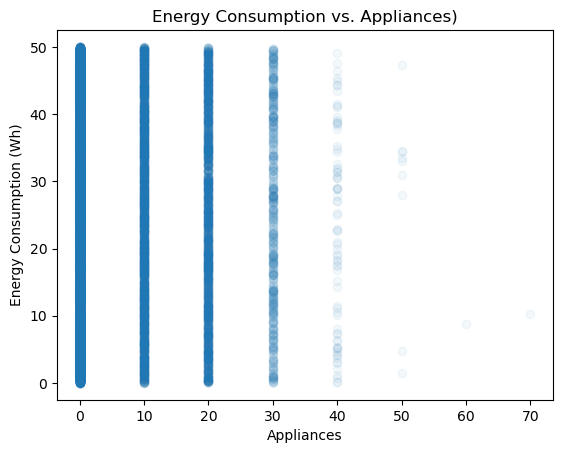

In [24]:
lights = energydata['lights'].values

#energy consumption vs Appliances
plt.scatter(lights, energy_consumption, alpha=0.05)
plt.xlabel('Appliances')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. Appliances)')
plt.show()